Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print(X, "\n", y) 

[[0]
 [1]
 [2]
 [4]] 
 [4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
linear_model = PolynomialFeatures(1)
phi = linear_model.fit_transform(X)
print("Matrica dizajna:\n", phi)

Matrica dizajna:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
phi_T = phi.transpose()
w_pinv = matmul( pinv(phi), y )
w_linalg = matmul( matmul( inv( matmul( phi_T, phi ) ) , phi_T ) , y )
print(w_pinv, "\n", w_linalg)

[2.2        0.45714286] 
 [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

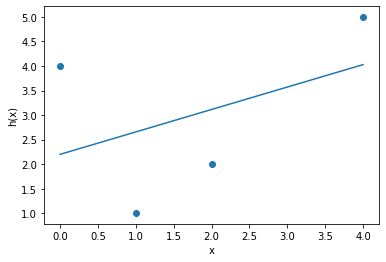

[4 1 2 5] 

 [[2.2       ]
 [2.65714286]
 [3.11428571]
 [4.02857143]]
Mean squared error:  2.042857142857143


In [7]:
# gore definirana funkcija pogreske ima 1/2 umjesto 1/N. 
# "realnija" je mean_squared_error jer je to zapravo "mean"
from sklearn.metrics import mean_squared_error

h = lambda x: w_pinv[0] + w_pinv[1] * x 
plt.xlabel("x")
plt.ylabel("h(x)")
plt.scatter(X, y)
plt.plot(X, h(X))
plt.show()


y_pred = np.array([h(i) for i in X])
print(y, "\n\n", y_pred)
E = mean_squared_error(y, y_pred)
print("Mean squared error: ", E)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
try:
    phi_inv = inv(phi)
except Exception as e:
    print(str(e))

# problem se moze rijesiti preslikavanjem primjera u visu dimenziju ako phi nije
# singularna matrica jer pri racunanju inverza, dijelimo s determinantom pa ona ne smije biti 0!
# determinanta ce biti 0 kada su neki stupci linearno zavisni kao u ovom primjeru:
primjer = np.array([ [1,2], [2,4] ])
print(primjer)
try:
    primjer_inv = inv(primjer)
except Exception as e:
    print(str(e))

Last 2 dimensions of the array must be square
[[1 2]
 [2 4]]
Singular matrix


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_model = LinearRegression().fit(X, y)
print("LinearRegression coefs:", linear_model.intercept_ ,linear_model.coef_)
print("Ranije izracunato:\t", w_pinv)
print("LR.predict: \t",linear_model.predict(X), "\nRanije izracunato:", y_pred.transpose())

LinearRegression coefs: 2.2 [0.45714286]
Ranije izracunato:	 [2.2        0.45714286]
LR.predict: 	 [2.2        2.65714286 3.11428571 4.02857143] 
Ranije izracunato: [[2.2        2.65714286 3.11428571 4.02857143]]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

f = lambda x, n: 5 + x - 2*x**2 - 5*x**3 + normal(loc=0.0, scale=n)

def make_labels(X, f, noise=0) :
    return np.array([f(x, noise) for x in X])

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

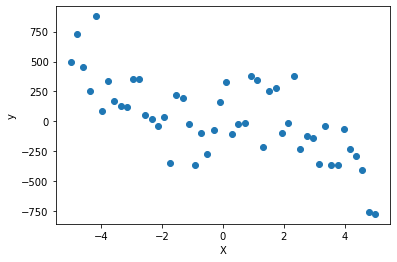

In [13]:
X = make_instances(-5,5,50)
y = make_labels(X, f, noise=200)
X_2a, y_2a = np.array(X), np.array(y)
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreska modela je  39499.29992931959


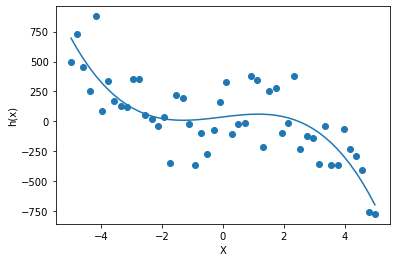

In [14]:
poly3 = PolynomialFeatures(degree=3)
phi = poly3.fit_transform(X)

model = LinearRegression()
model.fit(phi, y)
y_pred = model.predict(phi)
E = mean_squared_error(y, y_pred)
print("Pogreska modela je ", E)

plt.xlabel("X")
plt.ylabel("h(x)")
plt.scatter(X, y)
plt.plot(X, y_pred)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Stupanj,  1  Pogreska:  58241.846174066355
Stupanj,  3  Pogreska:  39499.29992931959
Stupanj,  5  Pogreska:  38338.46580316683
Stupanj,  10  Pogreska:  33674.54609551566
Stupanj,  20  Pogreska:  27938.999234374132


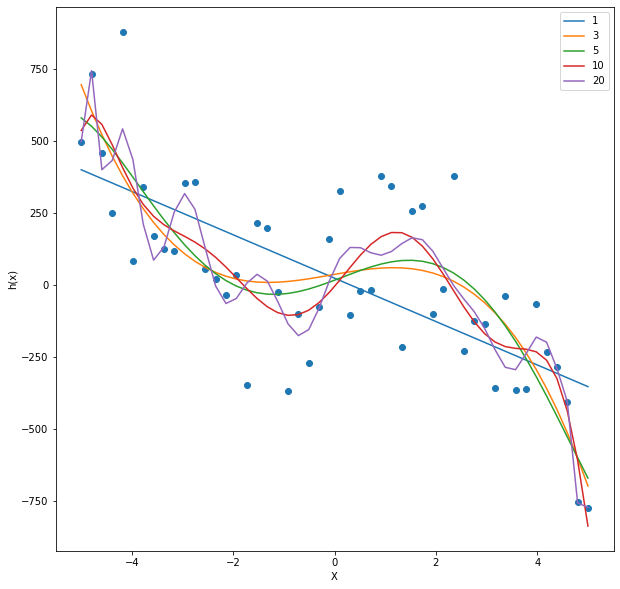

In [15]:
degrees = [1,3,5,10,20]
LR = LinearRegression()

plt.figure(figsize=(10,10))
plt.scatter(X, y)

for d in degrees:
    model = PolynomialFeatures(degree=d)
    phi = model.fit_transform(X)
    LR.fit(phi, y)
    y_pred = LR.predict(phi)
    E = mean_squared_error(y, y_pred)
    print("Stupanj, ", d," Pogreska: ", E)
    plt.plot(X, y_pred, label=str(d))

plt.xlabel("X")
plt.ylabel("h(x)")
plt.legend(loc="upper right")    
# najslozeniji model ima najmanju gresku jer testiramo na primjerima za ucenje 
# najveci stupanj polinoma se najvise prilagodi ulaznim podacima

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

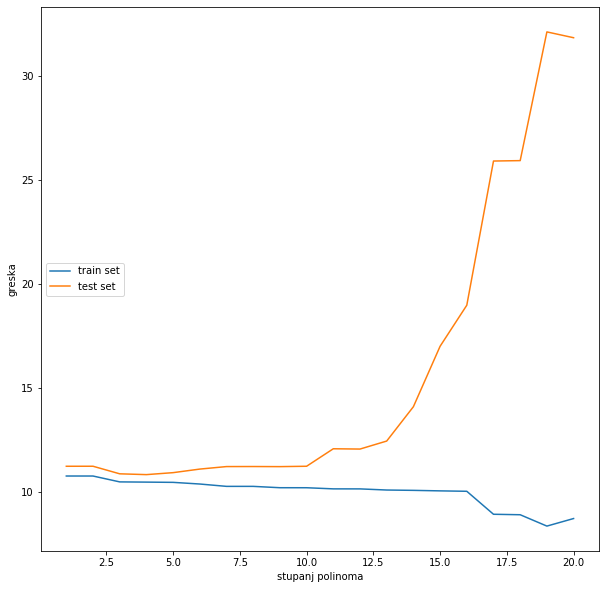

In [17]:

trainset = np.hstack([X,y])
trainset_3b = np.array(trainset)
train_set, test_set = train_test_split(trainset, test_size=0.5, train_size=0.5)
domain, train_e, test_e = range(1,21), [], []

for d in domain:
    model = PolynomialFeatures(degree=d)
    # train test
    X_train, y_train = np.transpose([train_set[:,0]]), np.transpose([train_set[:,1]])
    phi = model.fit_transform(X_train)
    LR.fit(phi, y_train)
    y_pred = LR.predict(phi)
    E = mean_squared_error(y_train, y_pred)
    train_e.append(np.log(E))
    # real test
    X_test, y_test = np.transpose([test_set[:,0]]), np.transpose([test_set[:,1]])
    phi = model.fit_transform(X_test)
    y_pred = LR.predict(phi)
    E = mean_squared_error(y_test, y_pred)
    test_e.append(np.log(E))

plt.figure(figsize=(10,10))
plt.plot(domain, train_e, label="train set")
plt.plot(domain, test_e, label="test set")
plt.legend(loc="center left")
plt.xlabel("stupanj polinoma")
plt.ylabel("greska")
plt.show()
# ocekivano, jako slozeni modeli zbog slabe generalizacije imaju veliku
# pogresku na nevidenim primjerima

# odabrao bih model koji na nevidenim primjerima postize najmanju pogresku 
# uz prioritizaciju jednostavnijih modela (3)

# kada bismo imali puno vise primjera to bi smanjilo prenaucenost

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

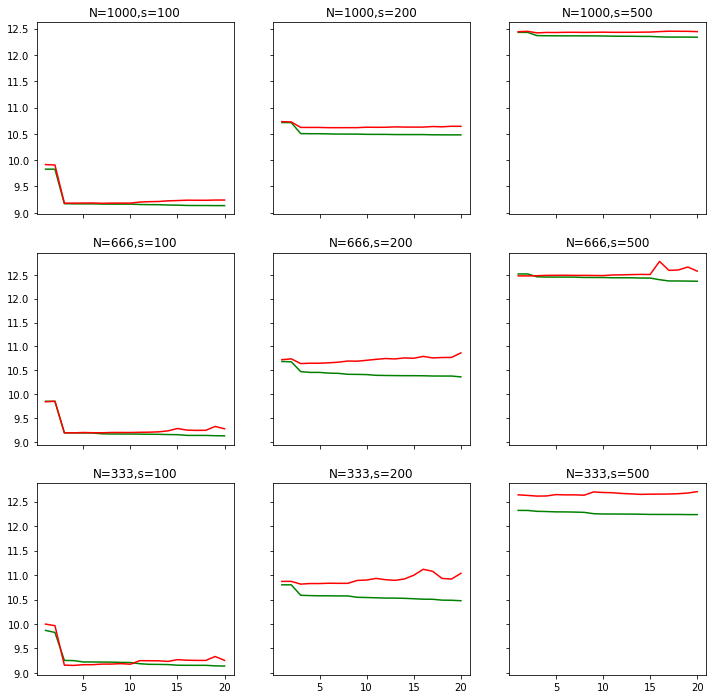

In [18]:
sigma = [100, 200, 500]
N = [1000,666,333]
trainsets, testsets = [], []

X = make_instances(-5,5,1000)
train_500, test_500 = train_test_split(X, test_size=0.5, train_size=0.5)

for s in sigma:
    y = make_labels(train_500, f, noise=s)
    trainsets.append( np.hstack([train_500, y]) )
    
    y = make_labels(test_500, f, noise=s)
    testsets.append( np.hstack([test_500,y]) )

id_third = np.random.randint(500, size=int(500/3))
id_2third = np.random.randint(500, size=int(500*2/3))    
for i in range(len(sigma)):
    trainsets.append( trainsets[i][id_2third,:])
    testsets.append( testsets[i][id_2third,:])
for i in range(len(sigma)):
    trainsets.append( trainsets[i][id_third,:])
    testsets.append( testsets[i][id_third,:])

train_e, test_e = [], []
for i in range(len(trainsets)):
    train_e.append([])
    test_e.append([])
    for d in domain:
        model = PolynomialFeatures(degree=d)
        # train test
        X_train = np.transpose([ trainsets[i][:,0] ])
        y_train = np.transpose([ trainsets[i][:,1] ])
        phi = model.fit_transform(X_train)
        LR.fit(phi, y_train)
        y_pred = LR.predict(phi)
        E = mean_squared_error(y_train, y_pred)
        train_e[i].append(np.log(E))
        # real test
        X_test = np.transpose([ testsets[i][:,0] ])
        y_test = np.transpose([ testsets[i][:,1] ])
        phi = model.fit_transform(X_test)
        y_pred = LR.predict(phi)
        E = mean_squared_error(y_test, y_pred)
        test_e[i].append(np.log(E))

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', sharey='row',figsize=(12,12))

ax1.set_title("N=1000,s=100")
ax1.plot(domain, train_e[0], c="g")
ax1.plot(domain, test_e[0], c ="r")

ax2.set_title("N=1000,s=200")
ax2.plot(domain, train_e[1], c="g")
ax2.plot(domain, test_e[1], c ="r")

ax3.set_title("N=1000,s=500")
ax3.plot(domain, train_e[2], c="g")
ax3.plot(domain, test_e[2], c ="r")

ax4.set_title("N=666,s=100")
ax4.plot(domain, train_e[3], c="g")
ax4.plot(domain, test_e[3], c ="r")

ax5.set_title("N=666,s=200")
ax5.plot(domain, train_e[4], c="g")
ax5.plot(domain, test_e[4], c ="r")

ax6.set_title("N=666,s=500")
ax6.plot(domain, train_e[5], c="g")
ax6.plot(domain, test_e[5], c ="r")

ax7.set_title("N=333,s=100")
ax7.plot(domain, train_e[6], c="g")
ax7.plot(domain, test_e[6], c ="r")

ax8.set_title("N=333,s=200")
ax8.plot(domain, train_e[7], c="g")
ax8.plot(domain, test_e[7], c ="r")

ax9.set_title("N=333,s=500")
ax9.plot(domain, train_e[8], c="g")
ax9.plot(domain, test_e[8], c ="r")
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print("Ulazi: ", np.transpose(X), "\nIzlazi ", y)
poly3 = PolynomialFeatures(3)
phi = poly3.fit_transform(X)
phi_T = phi.transpose()
print("Phi\n", phi)

L = [0, 1, 10]
for l in L:
    pseudo_i = matmul( inv( matmul(phi_T,phi)+l*np.identity(4) ), phi_T )
    w =  matmul( pseudo_i, y )
    p3 = lambda x: w[0]*x + w[1]*x**2 + w[2]*x**3 + w[3]*x**4
    print("lambda ", l)
    print("tezine", w)  
    #plt.scatter(X,y)
    #plt.plot(X, p3(X))
# matrica koja se invertira je dimenzija 4x4    
# broj primjera(reci) puta broj znacajki (stupci)

# sto je veci faktor regularizacije, dobivene hipoteze imaju manje tezine
# to je ocekivano jer regulazicaija kaznjava hipoteze s velikim tezinama

Ulazi:  [[0 1 2 4]] 
Izlazi  [4 1 2 5]
Phi
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
lambda  0
tezine [ 4.         -5.91666667  3.375      -0.45833333]
lambda  1
tezine [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
lambda  10
tezine [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
L = [0.0, 1.0, 10.0]
for l in L:
    RR = Ridge(alpha=l, fit_intercept=False)
    RR.fit(phi, y)
    print("lambda: ", l, "\nsklearn", RR.intercept_, RR.coef_) 

lambda:  0.0 
sklearn 0.0 [ 4.         -5.91666667  3.375      -0.45833333]
lambda:  1.0 
sklearn 0.0 [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
lambda:  10.0 
sklearn 0.0 [0.43312265 0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

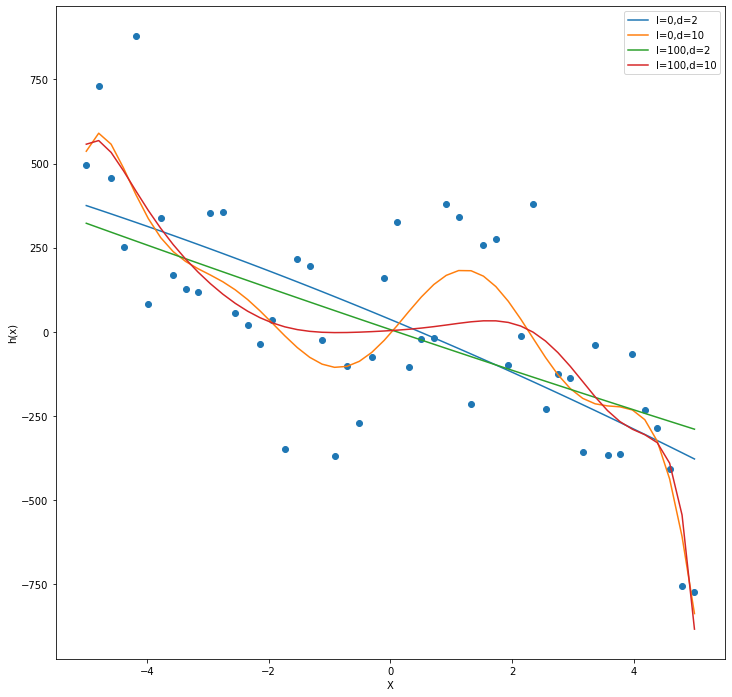

In [22]:
lambdas = [0, 100]
degrees = [2, 10]

plt.figure(figsize=(12,12))
plt.scatter(X_2a, y_2a)
for l in lambdas:
    for d in degrees:
        p = PolynomialFeatures(d)
        phi = p.fit_transform(X_2a)
        RR = Ridge(alpha=l, fit_intercept=False)
        RR.fit(phi, y_2a)
        y_pred = RR.predict(phi)
        plt.plot(X_2a, y_pred, label="l={},d={}".format(l,d))
plt.xlabel("X")
plt.ylabel("h(x)")
plt.legend(loc="upper right")
plt.show()
# rezultat je ocekivan, regularizacija je smanjila prenaucenost kaznjavajuci hipoteze s velikim vrijednostima tezina

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


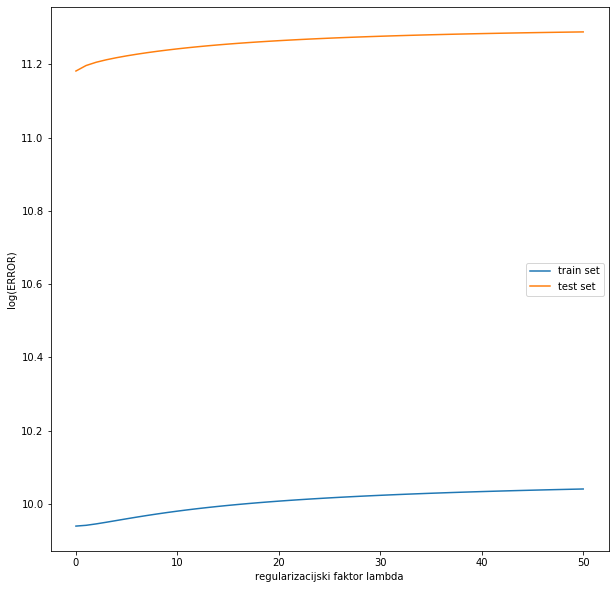

In [23]:
trainset = np.hstack([X_2a,y_2a])
train_set, test_set = train_test_split(trainset, test_size=0.5, train_size=0.5)
domain, train_e, test_e = [float(i) for i in range(0,51)], [], []
model = PolynomialFeatures(10)
X_train, y_train = np.transpose([train_set[:,0]]), np.transpose([train_set[:,1]])
X_test, y_test = np.transpose([test_set[:,0]]), np.transpose([test_set[:,1]])
phi_train = model.fit_transform(X_train)
phi_test = model.fit_transform(X_test)

for l in domain:
    # train test
    RR = Ridge(alpha=l, fit_intercept=False)
    RR.fit(phi_train, y_train)
    y_pred = RR.predict(phi_train)
    E = mean_squared_error(y_train, y_pred)
    train_e.append(np.log(E))
    # real test
    y_pred = RR.predict(phi_test)
    E = mean_squared_error(y_test, y_pred)
    test_e.append(np.log(E))


plt.figure(figsize=(10,10))
plt.xlabel("regularizacijski faktor lambda")
plt.ylabel("log(ERROR)")
plt.plot(domain, train_e, label="train set")
plt.plot(domain, test_e, label="test set")
plt.legend(loc="center right")

# uzeo bih lambda = 50 jer ima najmanju gresku na skupu za testiranje
# lijevo je prenaucenost, desno nije

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Broj tezina jednakih nuli:  1
Ukupan broj tezina:  12
L=100 : 11.083333333333334 % tezina je 0!


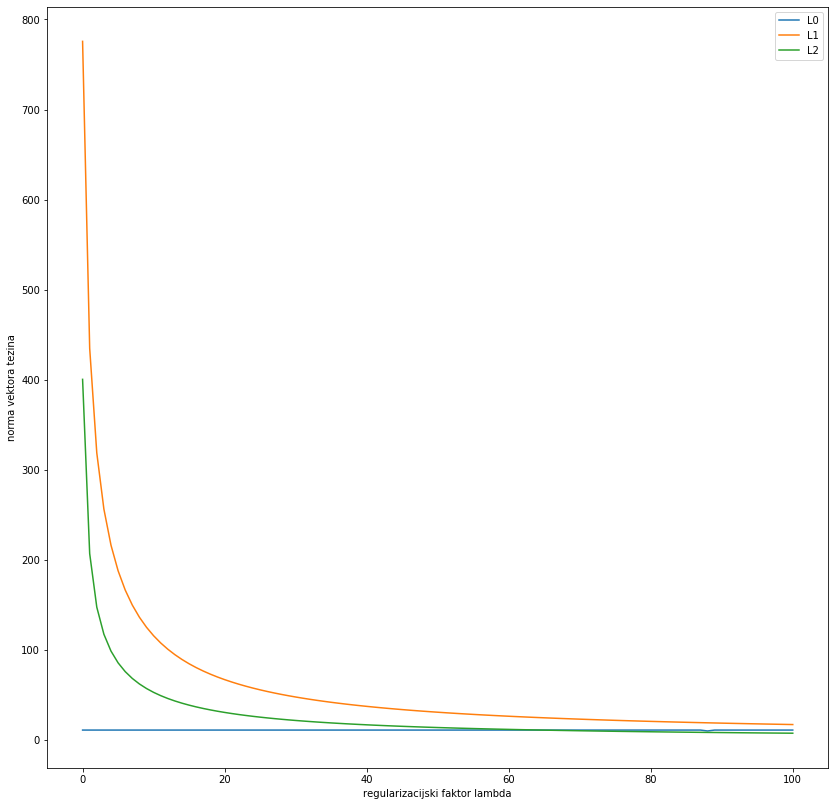

In [25]:
from sklearn.linear_model import Lasso

train_set, test_set = train_test_split(trainset_3b, test_size=0.5, train_size=0.5)
domain, train_e, test_e = [float(i) for i in range(0,101)], [], []
model = PolynomialFeatures(10)
X_train, y_train = np.transpose([train_set[:,0]]), np.transpose([train_set[:,1]])
X_test, y_test = np.transpose([test_set[:,0]]), np.transpose([test_set[:,1]])
phi_train = model.fit_transform(X_train)
phi_test = model.fit_transform(X_test)

def L1_norm(w):
    return sum([abs(x) for x in w])

def L2_norm(w):
    return np.sqrt(matmul(np.transpose(w),w))

L0, L1, L2 = [], [], []
for l in domain:
    # train test
    RR = Ridge(alpha=l, fit_intercept=False)
    RR.fit(phi_train, y_train)
    # calculating L 0,1,2
    w = np.append(RR.intercept_, np.array(RR.coef_))
    #print(w)   
    
    L0.append(nonzeroes(w))
    L1.append(L1_norm(w))
    L2.append(L2_norm(w))
    y_pred = RR.predict(phi_train)
    E = mean_squared_error(y_train, y_pred)
    train_e.append(np.log(E))
    # real test
    y_pred = RR.predict(phi_test)
    E = mean_squared_error(y_test, y_pred)
    test_e.append(np.log(E))
    
    if l == 100:
        print("Broj tezina jednakih nuli: ", w.shape[0]-nonzeroes(w))
        print("Ukupan broj tezina: ", w.shape[0])
        print("L=100 :", w.shape[0]-nonzeroes(w) / w.shape[0], "% tezina je 0!")


plt.figure(figsize=(14,14))
plt.xlabel("regularizacijski faktor lambda")
plt.ylabel("norma vektora tezina")
plt.plot(domain, L0, label="L0")
plt.plot(domain, L1, label="L1")
plt.plot(domain, L2, label="L2")
plt.legend(loc="upper right")
plt.show()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/home/prase/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447003.33190276765, tolerance: 345.6270422671646
  positive)
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453650.60748978064, tolerance: 345.6270422671646
  positive)
/home/prase/.local/lib/python3.7/sit

/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513237.3746971601, tolerance: 345.6270422671646
  positive)
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513132.904506268, tolerance: 345.6270422671646
  positive)
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513028.6284187504, tolerance: 345.6270422671646
  positive)
/home/prase/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Broj tezina jednakih nuli:  5
Ukupan broj tezina:  12
L=100 : 11.416666666666666 % tezina je 0!


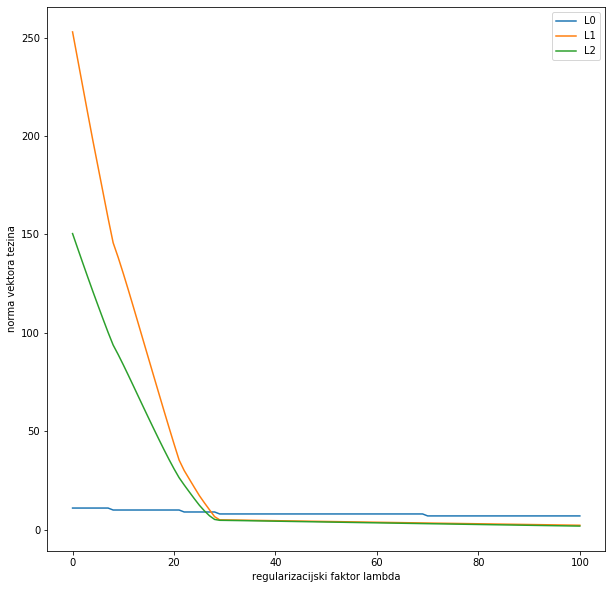

In [26]:
train_set, test_set = train_test_split(trainset_3b, test_size=0.5, train_size=0.5)
domain, train_e, test_e = [float(i) for i in range(0,101)], [], []
model = PolynomialFeatures(10)
X_train, y_train = np.transpose([train_set[:,0]]), np.transpose([train_set[:,1]])
X_test, y_test = np.transpose([test_set[:,0]]), np.transpose([test_set[:,1]])
phi_train = model.fit_transform(X_train)
phi_test = model.fit_transform(X_test)

L0, L1, L2 = [], [], []
for l in domain:
    # train test
    RR = Lasso(alpha=l, fit_intercept=False)
    RR.fit(phi_train, y_train)
    # calculating L 0,1,2
    w = np.append(RR.intercept_, np.array(RR.coef_))
    #print(w)
    L0.append(nonzeroes(w))
    L1.append(L1_norm(w))
    L2.append(L2_norm(w))
    y_pred = RR.predict(phi_train)
    E = mean_squared_error(y_train, y_pred)
    train_e.append(np.log(E))
    # real test
    y_pred = RR.predict(phi_test)
    E = mean_squared_error(y_test, y_pred)
    test_e.append(np.log(E))

    if l == 100:
        print("Broj tezina jednakih nuli: ", w.shape[0]-nonzeroes(w))
        print("Ukupan broj tezina: ", w.shape[0])
        print("L=100 :", w.shape[0]-nonzeroes(w) / w.shape[0], "% tezina je 0!")

    
plt.figure(figsize=(10,10))
plt.xlabel("regularizacijski faktor lambda")
plt.ylabel("norma vektora tezina") 
plt.plot(domain, L0, label="L0")
plt.plot(domain, L1, label="L1")
plt.plot(domain, L2, label="L2")
plt.legend(loc="upper right")
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

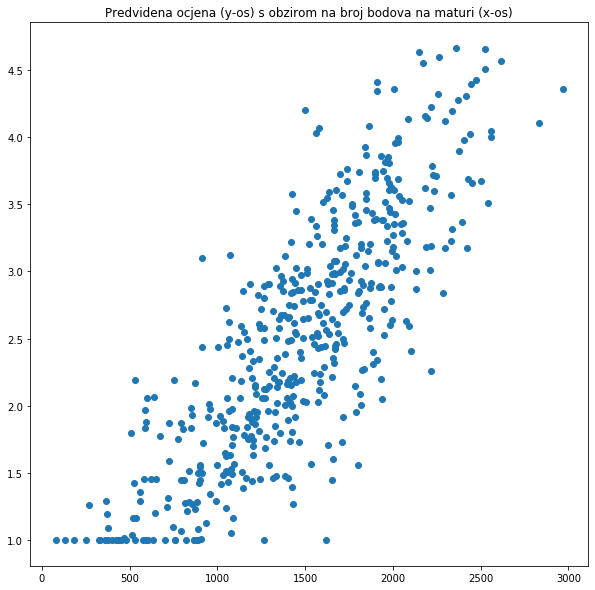

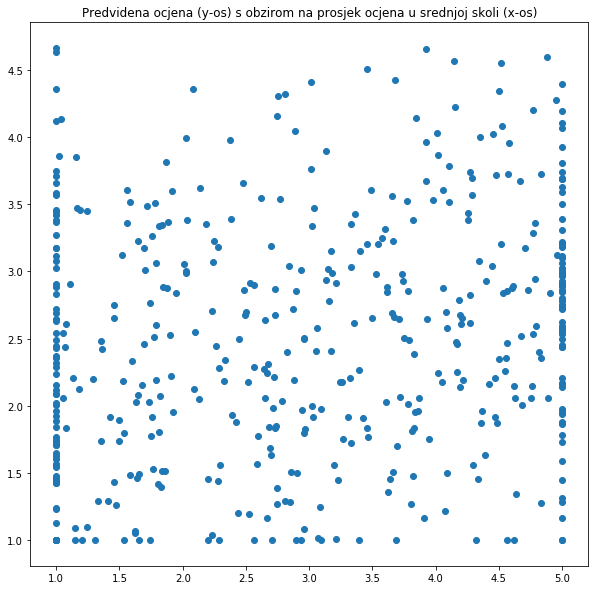

In [28]:
plt.figure(figsize=(10,10))
plt.scatter( exam_score , grades_y)
plt.title("Predvidena ocjena (y-os) s obzirom na broj bodova na maturi (x-os)")
plt.show()
plt.figure(figsize=(10,10))
plt.title("Predvidena ocjena (y-os) s obzirom na prosjek ocjena u srednjoj skoli (x-os)")
plt.scatter( grade_in_highschool, grades_y)

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
RR_001 = Ridge(alpha=0.01)
RR_001.fit(grades_X, grades_y)
print(RR_001.intercept_, RR_001.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)

grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

RR_001.fit(grades_X_fixed, grades_y_fixed)

print(RR_001.intercept_, RR_001.coef_)

# prva znacajka, broj bodova na maturi bi trebala imati vecu magnitudu
# odgovara mojoj intuiciji, matura je bolji pokazatelj znanja nego ocjene u srednjoj skoli

[8.62551331e-17] [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
col = np.array(grades_X_fixed[:,-1]).reshape(500,1)
grades_X_fixed_colinear = np.hstack([grades_X_fixed, col ])
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
RR_001.fit(grades_X_fixed_colinear, grades_y)
print(RR_001.intercept_, RR_001.coef_)

# zbog uvedene kolinearnosti imamo numericki nestabilno rjesenje -> prenaucenost

2.5030316359918503 [0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
RR_001 = Ridge(alpha=0.01)
RR_1000 = Ridge(alpha=1000)
w_001, w_1000 = np.array([0,0,0,0]), np.array([0,0,0,0])
trainset = np.hstack([grades_X_fixed_colinear, grades_y.reshape(500,1)])
for i in range(10):
    train_set, test_set = train_test_split(trainset, test_size=0.5, train_size=0.5)
    X_train, y_train = train_set[:,:-1], np.transpose([train_set[:,-1]])
    RR_001.fit(X_train, y_train)
    RR_1000.fit(X_train, y_train)
    
    row_001 = np.hstack([RR_001.intercept_.reshape(1,1), RR_001.coef_.reshape(1,3)])
    row_1000 = np.hstack([RR_1000.intercept_.reshape(1,1), RR_1000.coef_.reshape(1,3)])
    
    w_001 = np.vstack([w_001, row_001] )
    w_1000= np.vstack([w_1000, row_1000] )

    
print("L=0.01\n", w_001[1:])
print("L=1000\n",w_1000[1:])
std_001, std_1000 = [], []

std_001.append(np.std(w_001, axis=0))
std_1000.append(np.std(w_1000, axis=0))

print("Standard deviations of each weight for L=0,01\n", std_001)
print("Standard deviations of each weight for L=1000\n", std_1000)

L=0.01
 [[2.49355825 0.71920557 0.05892704 0.05892704]
 [2.52252867 0.73147134 0.06895112 0.06895112]
 [2.51137967 0.73760284 0.06951859 0.06951859]
 [2.48653792 0.75435652 0.06779841 0.06779841]
 [2.51446443 0.72238097 0.07260145 0.07260145]
 [2.50559652 0.74149514 0.0409969  0.0409969 ]
 [2.46177705 0.72555863 0.05567666 0.05567666]
 [2.51083392 0.73579711 0.06023195 0.06023195]
 [2.49218079 0.73838298 0.04026645 0.04026645]
 [2.48691312 0.74222475 0.06744017 0.06744017]]
L=1000
 [[2.48174234 0.14890855 0.0345435  0.0345435 ]
 [2.53213245 0.14488565 0.02188302 0.02188302]
 [2.47946072 0.14611719 0.02461645 0.02461645]
 [2.45803751 0.15020984 0.03085084 0.03085084]
 [2.48034026 0.14226771 0.02414177 0.02414177]
 [2.5184904  0.16156482 0.02888502 0.02888502]
 [2.45406696 0.14100268 0.02036078 0.02036078]
 [2.52460227 0.14653773 0.02787673 0.02787673]
 [2.54407594 0.15031588 0.01606093 0.01606093]
 [2.44771824 0.15054698 0.02796985 0.02796985]]
Standard deviations of each weight for L=0

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
from numpy.linalg import cond

L = [0.01, 10]
regularization = 2
model = PolynomialFeatures(10)
phi = model.fit_transform(grades_X_fixed_colinear)
phi_T = np.transpose(phi)
jedinicna = np.identity(phi.shape[0])
for l in L:
    print("lambda: ", l, "\n", cond(  matmul(phi, phi_T) + np.multiply(jedinicna,l) ))
# regularizacja drasticno smanjuje kondicijski broj matrice tako sto smanjuje multikolinearnost
# dodavanje vrijednosti na dijagonalu matrice smanjuje linearnu zavisnost

lambda:  0.01 
 266005998447.37955
lambda:  10 
 265994025.13043013


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  